In [94]:
from os import path
from pydub import AudioSegment

src = 'audio/testMP3.mp3'
dst = 'audio/test.wav'

#Convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

<_io.BufferedRandom name='audio/test.wav'>

In [95]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np

filename = "audio/test.wav"
ipd.Audio(filename) 


Separate to windows: Sample the input with windows of size n_fft=2048, making hops of size hop_length=512 each time to sample the next window.

Compute FFT for each window to transform from time domain to frequency domain.

Generate a Mel scale: Take the entire frequency spectrum, and separate it into n_mels=128 evenly spaced frequencies.

Generate Spectrogram: For each window, decompose the magnitude of the signal into its components, corresponding to the frequencies in the mel scale.

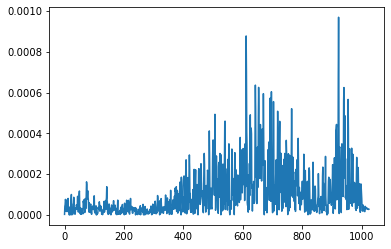

In [96]:
#Taking one short time window to see what we get from applying the Fourier Transform.
n_fft = 2048
D = np.abs(librosa.stft(x[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);

In [97]:
#Take the complete song, separate it to time windows, and apply the Fourier Transform on each time window.
hop_length = 512
D = np.abs(librosa.stft(x, n_fft=n_fft,  hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

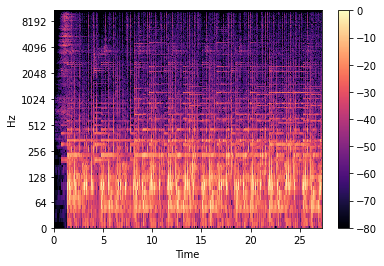

In [98]:
#Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar();

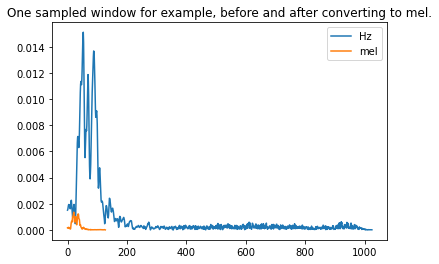

In [99]:
plt.plot(D[:, 1]);
plt.plot(mel.dot(D[:, 1]));
plt.legend(labels=['Hz', 'mel']);
plt.title('One sampled window for example, before and after converting to mel.');

In [100]:
S = librosa.feature.melspectrogram(x, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar();